## IMPORTING DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import operator as op
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_excel('/content/fertility_diagnosis.xlsx')
data

,Season,Season-,Season-winter,Season-spring,Season-summer,Season-fall,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,smoking habit-,smoking-never,smoking-occasional,smoking-daily,Number of hours spent sitting per day,Diagnosis
0,-0.33,2,0,1,0,0,30,0,1,1,0,0.8,0,2,0,1,0,16,N
1,-0.33,2,0,1,0,0,35,1,0,1,0,0.8,1,3,0,0,1,6,O
2,-0.33,2,0,1,0,0,27,1,0,0,0,1.0,-1,1,1,0,0,9,N
3,-0.33,2,0,1,0,0,32,0,1,1,0,1.0,-1,1,1,0,0,7,N
4,-0.33,2,0,1,0,0,30,1,1,0,0,0.8,-1,1,1,0,0,9,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.00,1,1,0,0,0,30,1,0,0,0,1.0,-1,1,1,0,0,9,N
96,-1.00,1,1,0,0,0,29,1,0,0,0,0.8,0,2,0,1,0,9,N
97,-1.00,1,1,0,0,0,30,1,1,1,0,1.0,-1,1,1,0,0,6,N
98,-1.00,1,1,0,0,0,30,1,0,1,0,1.0,0,2,0,1,0,3,N


In [ ]:
data= data.rename(columns = {'Season':'S1','Season-':'Season','Age':'age', 'Childish diseases': 'childish diseases','Accident or serious trauma':'Accident trauma','Surgical intervention':'surgical intervention',
                             'High fevers in the last year':'High fevers','Frequency of alcohol consumption':'alcohol consumption','Smoking habit':'smoking habit','smoking habit':'smoking habit-','Number of hours spent sitting per day':'sitting per day'
                             ,'Diagnosis':'output'})
data

,S1,Season,Season-winter,Season-spring,Season-summer,Season-fall,age,childish diseases,Accident trauma,surgical intervention,High fevers,alcohol consumption,smoking habit,smoking habit-,smoking-never,smoking-occasional,smoking-daily,sitting per day,output
0,-0.33,2,0,1,0,0,30,0,1,1,0,0.8,0,2,0,1,0,16,N
1,-0.33,2,0,1,0,0,35,1,0,1,0,0.8,1,3,0,0,1,6,O
2,-0.33,2,0,1,0,0,27,1,0,0,0,1.0,-1,1,1,0,0,9,N
3,-0.33,2,0,1,0,0,32,0,1,1,0,1.0,-1,1,1,0,0,7,N
4,-0.33,2,0,1,0,0,30,1,1,0,0,0.8,-1,1,1,0,0,9,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.00,1,1,0,0,0,30,1,0,0,0,1.0,-1,1,1,0,0,9,N
96,-1.00,1,1,0,0,0,29,1,0,0,0,0.8,0,2,0,1,0,9,N
97,-1.00,1,1,0,0,0,30,1,1,1,0,1.0,-1,1,1,0,0,6,N
98,-1.00,1,1,0,0,0,30,1,0,1,0,1.0,0,2,0,1,0,3,N


In [ ]:
data.output.replace(('N','O'),(0,1),inplace=True)
data

,S1,Season,Season-winter,Season-spring,Season-summer,Season-fall,age,childish diseases,Accident trauma,surgical intervention,High fevers,alcohol consumption,smoking habit,smoking habit-,smoking-never,smoking-occasional,smoking-daily,sitting per day,output
0,-0.33,2,0,1,0,0,30,0,1,1,0,0.8,0,2,0,1,0,16,0
1,-0.33,2,0,1,0,0,35,1,0,1,0,0.8,1,3,0,0,1,6,1
2,-0.33,2,0,1,0,0,27,1,0,0,0,1.0,-1,1,1,0,0,9,0
3,-0.33,2,0,1,0,0,32,0,1,1,0,1.0,-1,1,1,0,0,7,0
4,-0.33,2,0,1,0,0,30,1,1,0,0,0.8,-1,1,1,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.00,1,1,0,0,0,30,1,0,0,0,1.0,-1,1,1,0,0,9,0
96,-1.00,1,1,0,0,0,29,1,0,0,0,0.8,0,2,0,1,0,9,0
97,-1.00,1,1,0,0,0,30,1,1,1,0,1.0,-1,1,1,0,0,6,0
98,-1.00,1,1,0,0,0,30,1,0,1,0,1.0,0,2,0,1,0,3,0


In [ ]:
data.shape

(100, 19)

In [ ]:
data.isnull().sum()

S1                       0
Season                   0
Season-winter            0
Season-spring            0
Season-summer            0
Season-fall              0
age                      0
childish diseases        0
Accident trauma          0
surgical intervention    0
High fevers              0
alcohol consumption      0
smoking habit            0
smoking habit-           0
smoking-never            0
smoking-occasional       0
smoking-daily            0
sitting per day          0
output                   0
dtype: int64

In [ ]:
d=data.loc[:,"age"]
d

0     30
1     35
2     27
3     32
4     30
      ..
95    30
96    29
97    30
98    30
99    30
Name: age, Length: 100, dtype: int64

In [ ]:
imp = pd.Series(d).value_counts()
print("Age count")
print(imp)

Age count
28    28
30    27
32    17
27     7
33     7
29     5
35     4
36     2
31     2
34     1
Name: age, dtype: int64


## EDA

#### PLOT 1

Text(0.5, 1.0, 'season vs output')

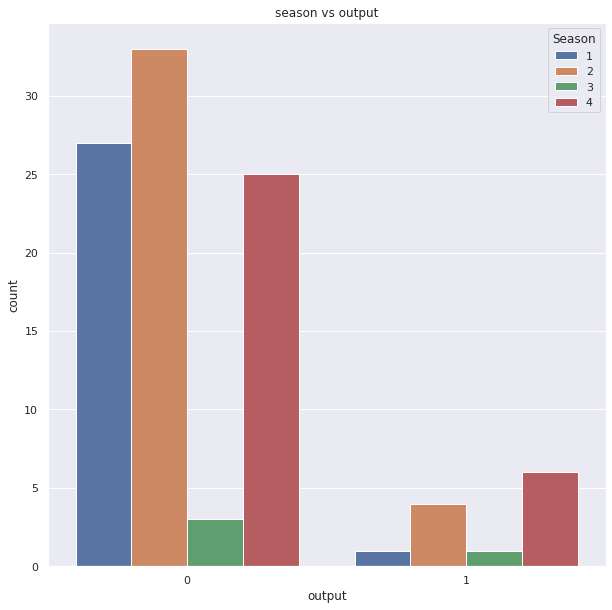

In [ ]:
sns.countplot(x='output',hue='Season',data=data)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("season vs output")

Text(0.5, 0, 'High fevers ')

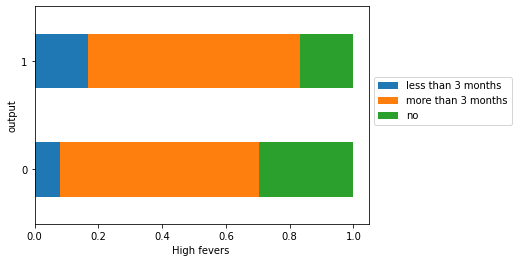

In [ ]:
gender_group = data.groupby(['output', 'High fevers']).size().unstack()

gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)

plt.legend(['less than 3 months','more than 3 months','no'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('High fevers ')

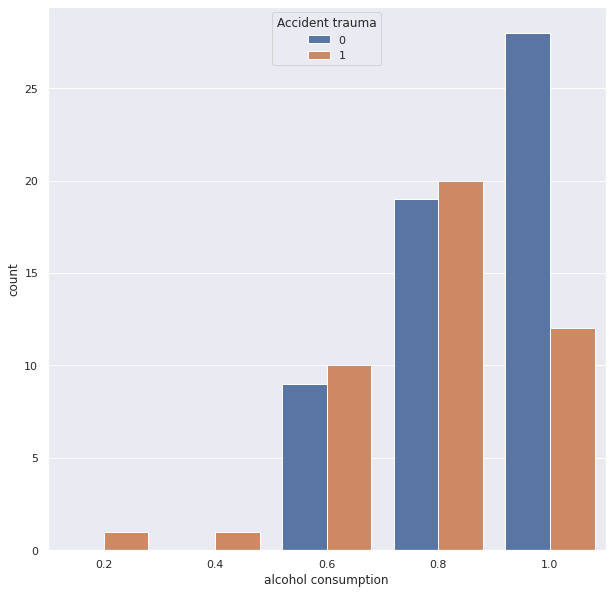

In [ ]:
sns.countplot(x="alcohol consumption", hue="Accident trauma", data=data)

Plot 1


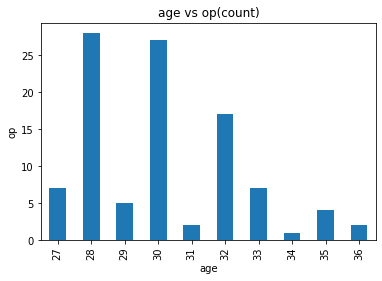

In [ ]:
# AGE VS OUTPUT
from matplotlib import pyplot as plt
C1 = data.groupby('age')['output'].count()
C1
#plot count
print("Plot 1")
C1.plot(kind="bar", title="test")
plt.title("age vs op(count)")
plt.xlabel("age")
plt.ylabel("op")
plt.show();

#### PLOT 2

In [ ]:
plt.figure(figsize=(9,6))
print("plot 2")
sns.barplot(x='childhood diseases', y='High feres', data=data)
plt.title('Distribution Of age with sitting hours', fontsize=20)

plot 2


ValueError: ignored

<Figure size 648x432 with 0 Axes>

plot 2


Text(0.5, 1.0, 'Distribution Of age with sitting hours')

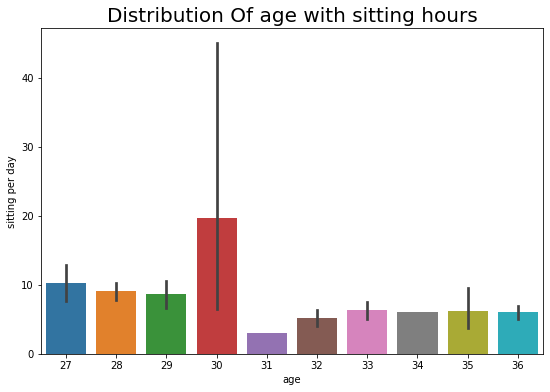

In [ ]:
plt.figure(figsize=(9,6))
print("plot 2")
sns.barplot(x='age', y='sitting per day', data=data)
plt.title('Distribution Of age with sitting hours', fontsize=20)

#### PLOT 3

Plot 1


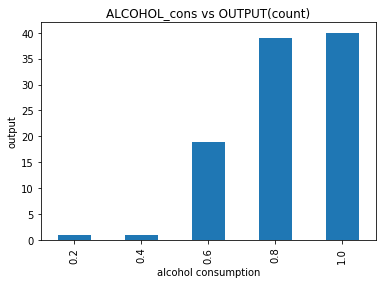

In [ ]:
C2 = data.groupby('alcohol consumption')['output'].count()
C2
#plot count
print("Plot 1")
C2.plot(kind="bar", title="test")
plt.title("ALCOHOL_cons vs OUTPUT(count)")
plt.xlabel("alcohol consumption")
plt.ylabel("output")
plt.show();


#### plot 4

Plot 4


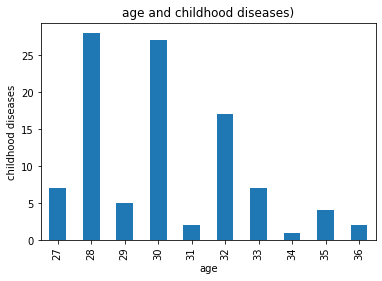

In [ ]:
from matplotlib import pyplot as plt
C3 = data.groupby('age')['childish diseases'].count()
C3
print("Plot 4")
C3.plot(kind="bar", title="test")
plt.title("age and childhood diseases)")
plt.xlabel("age")
plt.ylabel("childhood diseases")
plt.show();

#### plot 5

Plot 1


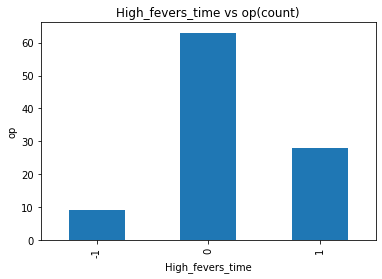

Plot 2


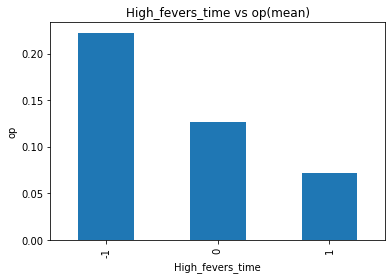

In [ ]:
C5 = data.groupby('High fevers')['output'].count()
C5
#plot count
print("Plot 1")
C5.plot(kind="bar", title="test")
plt.title("High_fevers_time vs op(count)")
plt.xlabel("High_fevers_time")
plt.ylabel("op")
plt.show();
#plot mean
print("Plot 2")
C5 = data.groupby('High fevers')['output'].mean()
C5
C5.plot(kind="bar", title="test")
plt.title("High_fevers_time vs op(mean)")
plt.xlabel("High_fevers_time")
plt.ylabel("op")
plt.show();

#### plot 6(cheeck)

Plot 6


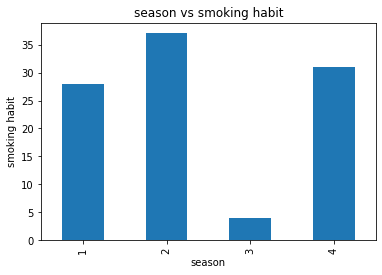

In [ ]:
from matplotlib import pyplot as plt
C3 = data.groupby('Season')['smoking habit'].count()
C3
print("Plot 6")
C3.plot(kind="bar", title="test")
plt.title("season vs smoking habit")
plt.xlabel("season")
plt.ylabel("smoking habit")
plt.show();

#### plot 7

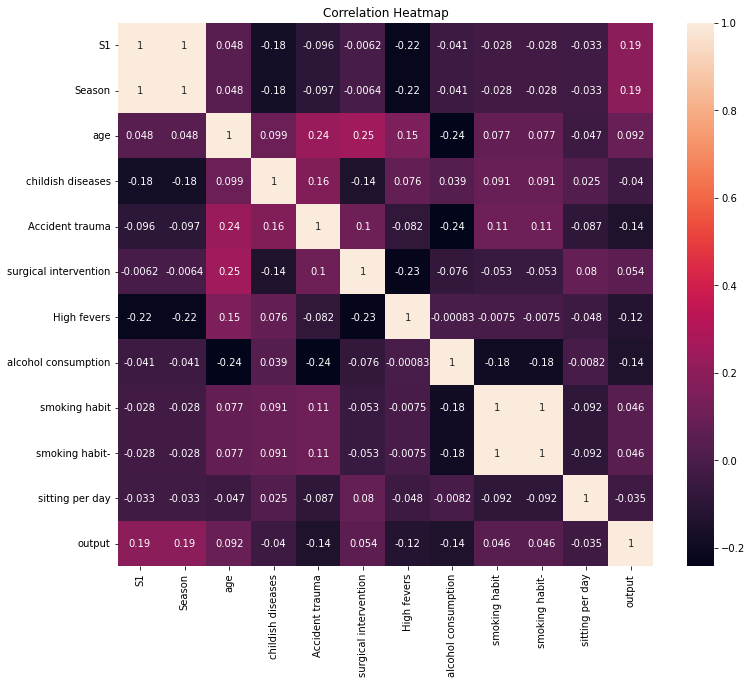

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

#### plotr 8

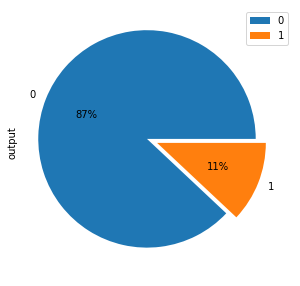

In [ ]:
#understanding output variable
plt.figure(figsize=(8,5))
explode=[0.1,0]
data['output'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

#### plot9

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


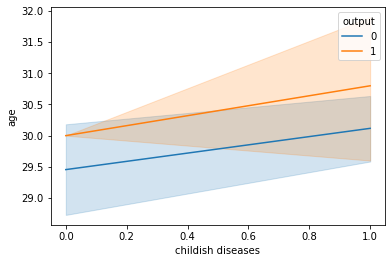

In [ ]:
#relation between childhish diseazes and age
sns.lineplot(data['childish diseases'],data['age'], hue=data["output"])

##### check

In [ ]:
#relatioin between accident and surgical intervention
#sns.lmplot(x="accident", y="intervention", hue="output", data=data, palette = 'inferno_r', height = 5)

#### plot 10

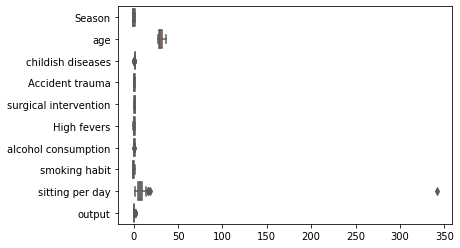

In [ ]:
# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=data, orient="h", palette="Set2", dodge=False)


#### plot 11

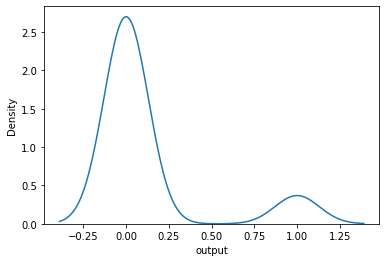

In [ ]:
sns.kdeplot(data["output"])

## MODEL FITTING for 80:20 ratio

In [ ]:
x = data.drop("output",axis="columns")
y = data.output

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 11)
(20, 11)
(80,)
(20,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(C=1e9)
lgt_model = lgt.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lgt_pred = lgt.predict(x_test)
lgt_acc = accuracy_score(y_test,lgt_pred)

In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(lgt_acc*100))

Accuracy of Logistic Regression: 90.00%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(x_test)
    return(classification_report(y_test,test_pred))

In [ ]:
test_result=get_test_result(lgt_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.00      0.00      0.00         1

    accuracy                           0.90        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.90      0.90      0.90        20



## KNN

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

### Training KNN Model

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Knn_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_test,Knn_pred)

In [ ]:
print(KNN_acc)

0.85


# SVM (Suport Vector Machine)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
#fit the model
knn.fit(x_train_std, y_train)
#predict the model
knn_pred = knn.predict(x_test_std)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,knn_pred), '\n')

Model Validation ==>

Accuracy Score of KNN Model::
0.85

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20
 



## SVM with RBF (Radial Basis Function)

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state= 0, probability=True)
classifier_rbf.fit(x_train_std, y_train)
#predicting
svc_pred_rbf = classifier_rbf.predict(x_test_std)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
SVM_Rad=metrics.accuracy_score(y_test,svc_pred_rbf)
print(SVM_Rad)
print("\n", "Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf), '\n')

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.85

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20
 



## SVM with Linear regresion

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
SVClass_linear = accuracy_score(y_test,predictions)
print(SVClass_linear)

0.85


# BAGGING 

## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
dct_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(dct_acc))

Test set accuracy: 0.80


## DECISION TREE with ginni index

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
DT_ginni=accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7500


In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training-set accuracy score: 0.9750
Test set score: 0.8500


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
RAD_pred = model.predict(x_test)
Rad_acc = accuracy_score(y_test,RAD_pred)

print(Rad_acc)

0.85


In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_predicted)
confusion

array([[17,  0],
       [ 3,  0]])

Text(33.0, 0.5, 'truth')

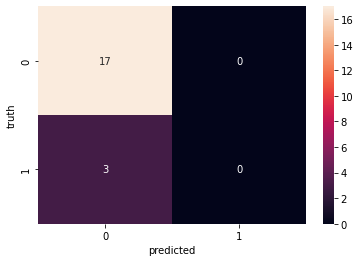

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# BOOSTING 

## ADA-BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_predict=adaboost.predict(x_test)
ADABoost_acc=metrics.accuracy_score(y_test,y_predict)
print(ADABoost_acc)

0.85


In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
ADA_Boost=metrics.accuracy_score(y_test, y_pred)
print(ADA_Boost)

0.85


## GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(x_train, y_train)

In [ ]:
y_predict = gbcl.predict(x_test)
GBC_acc=accuracy_score(y_test, y_predict)
print(GBC_acc)
print(metrics.confusion_matrix(y_test, y_predict))

0.85
[[17  0]
 [ 3  0]]


## XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier()

In [ ]:
predictions = xgb_classifier.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
XGB_acc=accuracy_score(y_test,predictions)
print(XGB_acc)

0.85


# Neural Network

### 5--2--1

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 50,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 346ms/step - loss: 0.3990 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.39900657534599304, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 362ms/step - loss: 0.5861 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.5860928893089294, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 334ms/step - loss: 3.1557 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.1557095050811768, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 750,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 345ms/step - loss: 3.0110 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.011024236679077, 0.800000011920929, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 250,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 373ms/step - loss: 1.3285 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.3285250663757324, 0.800000011920929, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 368ms/step - loss: 3.1218 - accuracy: 0.7500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.1217784881591797, 0.75, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 341ms/step - loss: 2.4620 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[2.462009906768799, 0.800000011920929, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 900,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 347ms/step - loss: 3.1137 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[3.1137073040008545, 0.800000011920929, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 50,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 338ms/step - loss: 0.3990 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.39900657534599304, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 600,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 626ms/step - loss: 2.7092 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[2.709210157394409, 0.800000011920929, 0.0, 0.0]

### 9--7--4--3--2--1

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 50,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.3540 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.3540019392967224, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 881ms/step - loss: 0.3419 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.3419494330883026, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 250,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 368ms/step - loss: 0.3606 - accuracy: 0.8500 - precision: 0.5000 - a=recall: 0.3333


[0.3606360852718353, 0.8500000238418579, 0.5, 0.3333333432674408]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 352ms/step - loss: 1.8922 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.8922088146209717, 0.800000011920929, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 600,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 399ms/step - loss: 1.0574 - accuracy: 0.8500 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.057420015335083, 0.8500000238418579, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 750,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 370ms/step - loss: 1.7658 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.7657861709594727, 0.800000011920929, 0.0, 0.0]

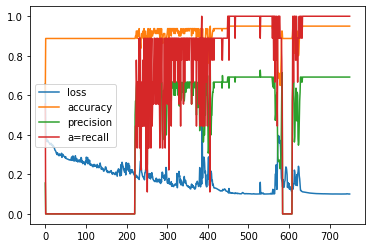

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x_train, y_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 382ms/step - loss: 2.2369 - accuracy: 0.8000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[2.2368569374084473, 0.800000011920929, 0.0, 0.0]

# FOR RATIO 80:20

*   Logistic Regression - 85.00
*   KNN                 - 90.00
*   SVM with KNN        - 90.00
       *   SVM with RBF        - 90.00
       *   SVM with Linear regression-90.00
*   Bagging
      *  Decision tree- 85.00
          *  Decision with "GINNI" index - 85.00
      *  Random forest - 75.00
*   Boosting
    * Ada Boost - 95.00
    * Gradient Boost - 80.00
    * XG boost - 90.00




# MODEL FITTING for 70:30 ratio

In [ ]:
x1 = data.drop("output",axis="columns")
y1 = data.output

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

In [ ]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(70, 11)
(30, 11)
(70,)
(30,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgt_acc1 = LogisticRegression(C=1e9)
lgt_model1 = lgt.fit(x1_train,y1_train)

In [ ]:
lgt_pred1 = lgt.predict(x1_test)
lgt_acc1 = accuracy_score(y1_test,lgt_pred1)

In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(lgt_acc1*100))

Accuracy of Logistic Regression: 93.33%


In [ ]:
def get_test_result(model):
    test_pred1 = model.predict(x1_test)
    return(classification_report(y1_test,test_pred1))

In [ ]:
test_result1=get_test_result(lgt_model1)
print(test_result1)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

## training knn model

In [ ]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Knn_pred1 = knn.predict(x1_test)
KNN_acc1 = accuracy_score(y1_test,Knn_pred1)

In [ ]:
print(KNN_acc1)

0.7666666666666667


# SVM

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
x1_train_std = scale.fit_transform(x1_train)
x1_test_std = scale.transform(x1_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=25)
#fit the model
knn1.fit(x1_train_std, y1_train)
#predict the model
knn_pred1 = knn.predict(x1_test_std)

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y1_test,knn_pred1))
print("\n", "Classification Report::")
print(metrics.classification_report(y1_test,knn_pred1), '\n')

Model Validation ==>

Accuracy Score of KNN Model::
0.8

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30
 



## svm with RBF

In [ ]:
from sklearn.svm import SVC
classifier_rbf1 = SVC(kernel = 'rbf', random_state= 0, probability=True)
classifier_rbf1.fit(x1_train_std, y1_train)
#predicting
svc_pred_rbf1 = classifier_rbf1.predict(x1_test_std)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
SVM_Rad1=metrics.accuracy_score(y1_test,svc_pred_rbf1)
print(SVM_Rad1)
print("\n", "Classification Report::")
print(metrics.classification_report(y1_test,svc_pred_rbf1), '\n')

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.8

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30
 



## svm withh linear reg

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(x1_train, y1_train)

SVC(kernel='linear')

In [ ]:
predictions1 = model1.predict(x1_test)
print(predictions1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
SVClass_linear1 = accuracy_score(y1_test,predictions1)
print(SVClass_linear1)

0.8


# bagging

##decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=5, random_state=1)
dt1.fit(x1_train, y1_train)
y1_pred = dt.predict(x1_test)
y1_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
from sklearn.metrics import accuracy_score
y1_pred = dt1.predict(x1_test)
dct_acc1 = accuracy_score(y1_test, y1_pred)
print("Test set accuracy: {:.2f}".format(dct_acc1))

Test set accuracy: 0.80


## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
model1=RandomForestClassifier(n_estimators=50)
model1.fit(x1_train,y1_train)
RAD_pred1 = model1.predict(x1_test)
Rad_acc1 = accuracy_score(y1_test,RAD_pred1)
Rad_acc1

0.8666666666666667

In [ ]:
y1_predicted=model1.predict(x1_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion1=confusion_matrix(y1_test,y1_predicted)
confusion1

array([[25,  1],
       [ 3,  1]])

# boosting

##ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator1 = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost1 = AdaBoostClassifier(base_estimator=base_estimator1,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
adaboost1.fit(x1_train, y1_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y1_predict=adaboost.predict(x1_test)
ADABoost_acc1=metrics.accuracy_score(y1_test,y1_predict)
print(ADABoost_acc1)

0.9


In [ ]:
abc1 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model1 = abc1.fit(x1_train, y1_train)
y1_pred = model1.predict(x1_test)

In [ ]:
ADA_Boost1=metrics.accuracy_score(y1_test, y1_pred)
print(ADA_Boost1)

0.8


## gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl1 = GradientBoostingClassifier(n_estimators = 50)
gbcl1 = gbcl1.fit(x1_train, y1_train)

In [ ]:
y1_predict = gbcl1.predict(x1_test)
GBC_acc1=accuracy_score(y1_test, y1_predict)
print(GBC_acc1)
print(metrics.confusion_matrix(y1_test, y1_predict))

0.8333333333333334
[[24  2]
 [ 3  1]]


## XG boost

In [ ]:
import xgboost as xgb
xgb_classifier1 = xgb.XGBClassifier()
xgb_classifier1.fit(x1_train,y1_train)

XGBClassifier()

In [ ]:
predictions1 = xgb_classifier.predict(x1_test)
predictions1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
XGB_acc1=accuracy_score(y1_test,predictions1)
print(XGB_acc1)

0.9333333333333333


# NN for 70:30


## 5--2--1

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 50,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 325ms/step - loss: 0.2765 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.27648550271987915, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 345ms/step - loss: 0.3749 - accuracy: 0.9000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.3749207556247711, 0.8999999761581421, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 250,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 349ms/step - loss: 0.6120 - accuracy: 0.7667 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.6119682192802429, 0.7666666507720947, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 333ms/step - loss: 1.2591 - accuracy: 0.7667 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.2591490745544434, 0.7666666507720947, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 600,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 340ms/step - loss: 1.3940 - accuracy: 0.7333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.394006609916687, 0.7333333492279053, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 750,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 1s 1s/step - loss: 1.6504 - accuracy: 0.7000 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.6503854990005493, 0.699999988079071, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 800,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 348ms/step - loss: 1.4846 - accuracy: 0.7667 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.484554648399353, 0.7666666507720947, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 341ms/step - loss: 1.9412 - accuracy: 0.7333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.941240668296814, 0.7333333492279053, 0.0, 0.0]

## 9--7--3--1

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 50,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 337ms/step - loss: 0.3594 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.359445720911026, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 357ms/step - loss: 0.2953 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.29529640078544617, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 250,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 371ms/step - loss: 0.2778 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.27784010767936707, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 351ms/step - loss: 0.2707 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.27065107226371765, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 600,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 353ms/step - loss: 0.2738 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.27384281158447266, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 750,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 350ms/step - loss: 0.2715 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.27146199345588684, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 351ms/step - loss: 0.2788 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.2787642478942871, 0.9333333373069763, 0.0, 0.0]

##  9--7--5--3--1

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 1000,verbose=0)

In [ ]:
model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 365ms/step - loss: 0.5704 - accuracy: 0.9333 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[0.5703619718551636, 0.9333333373069763, 0.0, 0.0]

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([ tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='a=recall')] )

In [ ]:
history= model.fit(x1_train, y1_train, epochs= 1000,verbose=0)

# for ratio 70:30

*   Logistic Regression - 80.00
*   KNN                 - 86.00
*   SVM with KNN        - 90.00
       *   SVM with RBF        - 90.00
       *   SVM with Linear regression-90.00
*   Bagging
      *  Decision tree- 87.00
      *  Random forest - 90.00
*   Boosting
    * Ada Boost - 93.00
    * Gradient Boost - 90.00
    * XG boost - 96.00